Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


Load Dataset

In [2]:
from google.colab import files
import pandas as pd

# Upload file from your computer
uploaded = files.upload()

# Suppose your file is 'restaurant_sales_data.csv'
df = pd.read_csv("restaurant_sales_data.csv")
df.head()


Saving restaurant_sales_data.csv to restaurant_sales_data.csv


,date,restaurant_id,restaurant_type,menu_item_name,meal_type,key_ingredients_tags,typical_ingredient_cost,observed_market_price,actual_selling_price,quantity_sold,has_promotion,special_event,weather_condition
0,1/1/2024,11,Food Stall,Laksa,Lunch,"rice noodles, fish broth, tamarind, shrimp pas...",4.5,10.59,12.48,361,False,False,Sunny
1,1/1/2024,7,Casual Dining,Spaghetti Carbonara,Dinner,"spaghetti, eggs, cheese, beef bacon, black pepper",9.0,26.64,60.46,105,False,False,Sunny
2,1/1/2024,23,Fine Dining,Beef Rendang,Dinner,"beef, coconut milk, galangal, lemongrass, spic...",9.0,49.42,80.15,36,False,False,Rainy
3,1/1/2024,22,Food Stall,Roti Canai,Dinner,"flour, ghee, egg, water, curry",0.8,2.04,2.48,503,False,False,Sunny
4,1/1/2024,32,Fine Dining,Spaghetti Carbonara,Lunch,"spaghetti, eggs, cheese, beef bacon, black pepper",9.0,40.30,55.54,262,False,False,Rainy


Data Understanding

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     10000 non-null  object 
 1   restaurant_id            10000 non-null  int64  
 2   restaurant_type          10000 non-null  object 
 3   menu_item_name           10000 non-null  object 
 4   meal_type                10000 non-null  object 
 5   key_ingredients_tags     10000 non-null  object 
 6   typical_ingredient_cost  10000 non-null  float64
 7   observed_market_price    10000 non-null  float64
 8   actual_selling_price     10000 non-null  float64
 9   quantity_sold            10000 non-null  int64  
 10  has_promotion            10000 non-null  bool   
 11  special_event            10000 non-null  bool   
 12  weather_condition        10000 non-null  object 
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 879.0+ KB


,0
date,0
restaurant_id,0
restaurant_type,0
menu_item_name,0
meal_type,0
key_ingredients_tags,0
typical_ingredient_cost,0
observed_market_price,0
actual_selling_price,0
quantity_sold,0


DATA CLEANING

1.Convert Date

In [44]:
df['date'] = pd.to_datetime(df['date'])


df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday','Sunday']).astype(int)


2.Handle Missing Values

Check missing values BEFORE cleaning

In [7]:
num_cols = ['typical_ingredient_cost','observed_market_price',
            'actual_selling_price','quantity_sold']

cat_cols = ['restaurant_type','menu_item_name','meal_type',
            'key_ingredients_tags','has_promotion',
            'special_event','weather_condition']

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [8]:
print("Missing values BEFORE cleaning:\n")
df[num_cols + cat_cols].isnull().sum()


Missing values BEFORE cleaning:



,0
typical_ingredient_cost,0
observed_market_price,0
actual_selling_price,0
quantity_sold,0
restaurant_type,0
menu_item_name,0
meal_type,0
key_ingredients_tags,0
has_promotion,0
special_event,0


Apply your cleaning code (NO output expected)

In [9]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


Check missing values AFTER cleaning

In [10]:
print("\nMissing values AFTER cleaning:\n")
df[num_cols + cat_cols].isnull().sum()



Missing values AFTER cleaning:



,0
typical_ingredient_cost,0
observed_market_price,0
actual_selling_price,0
quantity_sold,0
restaurant_type,0
menu_item_name,0
meal_type,0
key_ingredients_tags,0
has_promotion,0
special_event,0


In [11]:
import pandas as pd

before = df[num_cols + cat_cols].isnull().sum()

# Cleaning
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

after = df[num_cols + cat_cols].isnull().sum()

comparison = pd.DataFrame({
    'Missing Before': before,
    'Missing After': after
})

comparison


,Missing Before,Missing After
typical_ingredient_cost,0,0
observed_market_price,0,0
actual_selling_price,0,0
quantity_sold,0,0
restaurant_type,0,0
menu_item_name,0,0
meal_type,0,0
key_ingredients_tags,0,0
has_promotion,0,0
special_event,0,0


To visually confirm cleaning


In [12]:
df[num_cols + cat_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   typical_ingredient_cost  10000 non-null  float64
 1   observed_market_price    10000 non-null  float64
 2   actual_selling_price     10000 non-null  float64
 3   quantity_sold            10000 non-null  int64  
 4   restaurant_type          10000 non-null  object 
 5   menu_item_name           10000 non-null  object 
 6   meal_type                10000 non-null  object 
 7   key_ingredients_tags     10000 non-null  object 
 8   has_promotion            10000 non-null  bool   
 9   special_event            10000 non-null  bool   
 10  weather_condition        10000 non-null  object 
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 722.8+ KB


DATA ANALYSIS

1.Promotion Impact

In [13]:
df.groupby('has_promotion')['actual_selling_price'].mean()


,actual_selling_price
has_promotion,
False,19.783625
True,13.611162


2.Weather Impact

In [14]:
df.groupby('weather_condition')['quantity_sold'].mean()


,quantity_sold
weather_condition,
Cloudy,281.440722
Rainy,263.309726
Sunny,297.996162


DATA VISUALIZATION

1.Selling Price Distribution

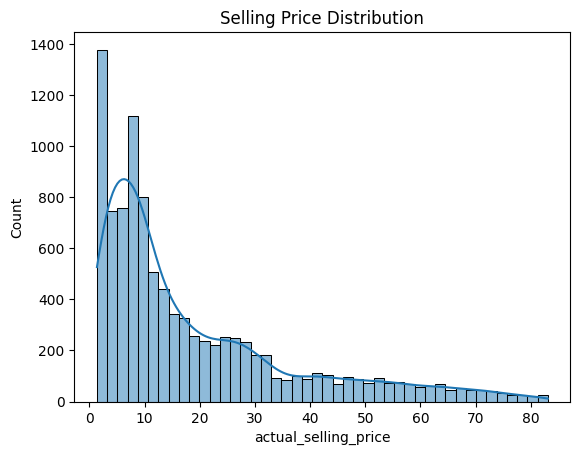

In [15]:
sns.histplot(df['actual_selling_price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()


2.Promotions vs Sales

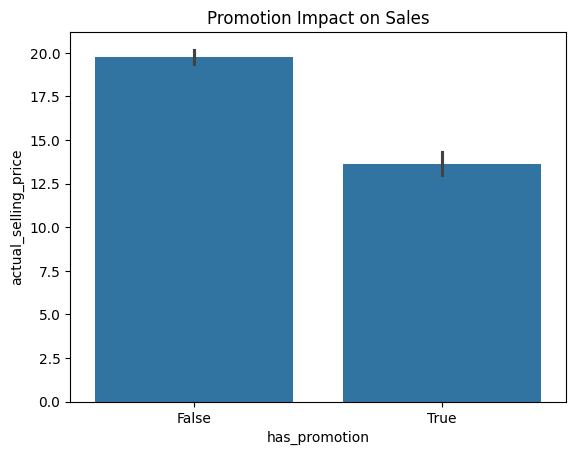

In [16]:
sns.barplot(x='has_promotion', y='actual_selling_price', data=df)
plt.title("Promotion Impact on Sales")
plt.show()


3.Quantity Sold Boxplot

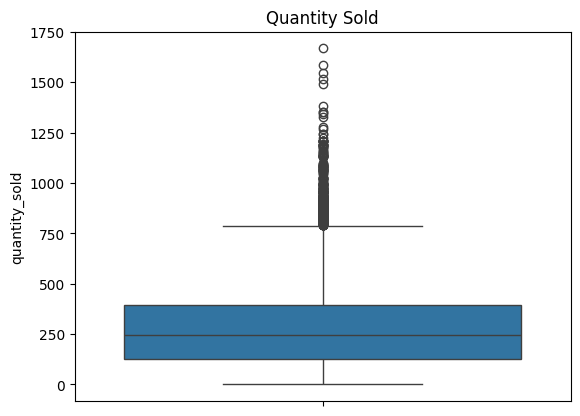

In [17]:
sns.boxplot(y=df['quantity_sold'])
plt.title("Quantity Sold")
plt.show()


4.Correlation Heatmap

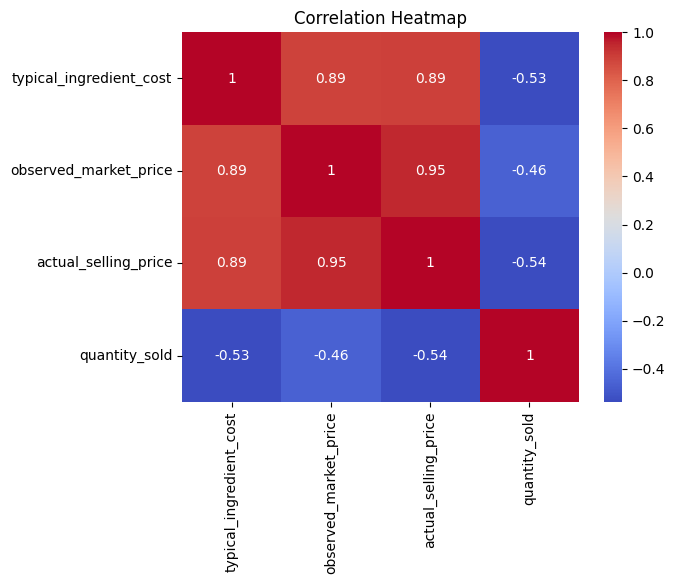

In [18]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


DEEP ANALYSIS

1.Weekend vs Weekday

In [23]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])


In [24]:
df['is_weekend'] = df['date'].dt.dayofweek >= 5


In [25]:
df['is_weekend'] = df['is_weekend'].astype(int)


In [26]:
df.groupby('is_weekend')['quantity_sold'].mean()


,quantity_sold
is_weekend,
0,253.073228
1,369.960596


2.Top Menu Items

In [21]:
df['menu_item_name'].value_counts().head(10)


,count
menu_item_name,
Kaya Toast Set,1245
Cendol,1219
Teh Tarik,1147
Tandoori Chicken,726
Roti Canai,706
Chicken Chop,693
Spaghetti Carbonara,685
Iced Lemon Tea,677
Mushroom Soup,671


REGRESSION MODEL

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Convert date to numeric

In [28]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].astype(int) // 10**9


One-Hot Encoding

In [29]:
df_reg = pd.get_dummies(df, drop_first=True)


Split features and target

In [30]:
X = df_reg.drop('actual_selling_price', axis=1)
y = df_reg['actual_selling_price']


Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Linear Regression

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression RMSE: 4.384892910877528
R2 Score: 0.9434998783532139


Random Forest Regression

In [33]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest RMSE: 2.558367788996532


CLASSIFICATION MODEL

🎯 High vs Low Sales Category

Create Target Variable

In [34]:
df['high_sales'] = (df['actual_selling_price'] >
                    df['actual_selling_price'].median()).astype(int)

df[['actual_selling_price', 'high_sales']].head()


,actual_selling_price,high_sales
0,12.48,1
1,60.46,1
2,80.15,1
3,2.48,0
4,55.54,1


Handle Date Column (IMPORTANT for Colab)

In [35]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].astype(int) // 10**9


One-Hot Encoding

In [36]:
df_clf = pd.get_dummies(df, drop_first=True)


Split Features and Target

In [37]:
Xc = df_clf.drop(['actual_selling_price', 'high_sales'], axis=1)
yc = df_clf['high_sales']


Train-Test Split

In [38]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    Xc, yc, test_size=0.2, random_state=42
)


Feature Scaling

In [39]:
scaler_c = StandardScaler()

X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)


In [40]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)

y_pred_log = log_reg.predict(X_test_c)

print("Logistic Regression Results")
print("----------------------------")
print("Accuracy:", accuracy_score(y_test_c, y_pred_log))
print("\nClassification Report:\n")
print(classification_report(y_test_c, y_pred_log))


Logistic Regression Results
----------------------------
Accuracy: 0.98

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       998
           1       0.98      0.98      0.98      1002

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



RANDOM FOREST CLASSIFICATION

In [41]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_clf.fit(X_train_c, y_train_c)

y_pred_rf_c = rf_clf.predict(X_test_c)

print("\nRandom Forest Classification Results")
print("------------------------------------")
print("Accuracy:", accuracy_score(y_test_c, y_pred_rf_c))



Random Forest Classification Results
------------------------------------
Accuracy: 0.9745


In [42]:
confusion_matrix(y_test_c, y_pred_rf_c)


array([[966,  32],
       [ 19, 983]])

CONFUSION MATRIX

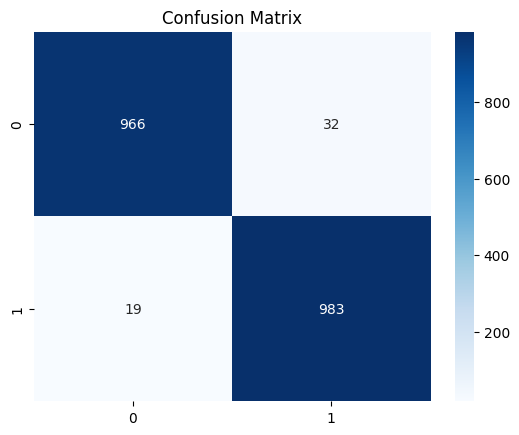

In [43]:
cm = confusion_matrix(y_test_c, y_pred_rf_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
